In [1]:
%matplotlib widget
import processscheduler as ps

### Resource assignement
Two tasks, two resources

Solver type:
===========

-> Standard SAT/SMT solver

Total computation time:
=====================

ResourceAssignment satisfiability checked in 0.04s

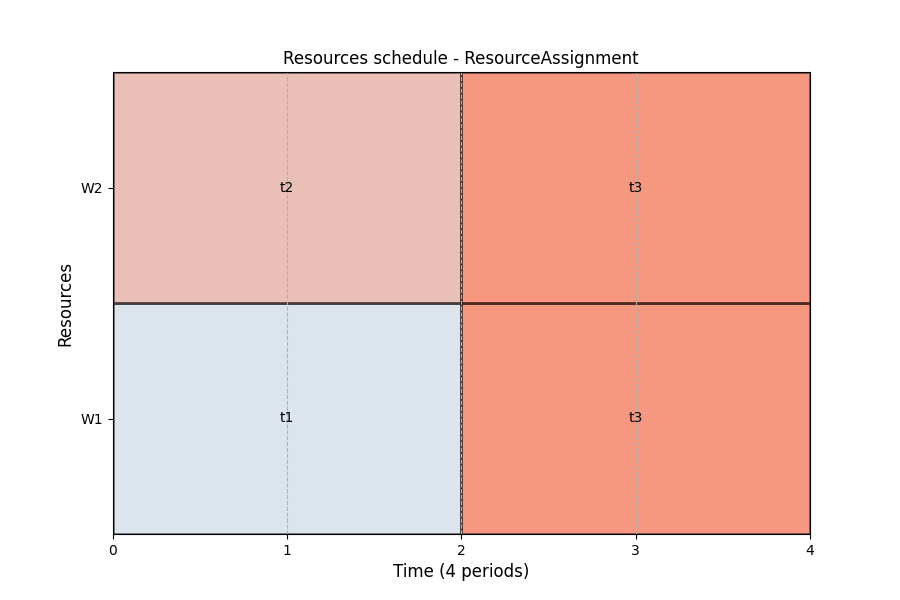

In [2]:
# problem
pb_ra = ps.SchedulingProblem(name="ResourceAssignment")
# tasks
t1 = ps.FixedDurationTask(name="t1", duration=2)
t2 = ps.FixedDurationTask(name="t2", duration=2)
t3 = ps.FixedDurationTask(name="t3", duration=2)

# resource requirements
w1 = ps.Worker(name="W1")
w2 = ps.Worker(name="W2")

# resource assignement
t1.add_required_resource(w1)  # t1 only needs w1
t2.add_required_resource(w2)  # t2 only needs w2
t3.add_required_resource(w1)  # t2 needs both w1 AND w2
t3.add_required_resource(w2)

# solve
solver1 = ps.SchedulingSolver(problem=pb_ra)
solution1 = solver1.solve()
ps.render_gantt_matplotlib(solution1)

### TaskDontOverlap constraint
Make two tasks don't overlap, one is scheduled after the other, or the opposite.

Solver type:
===========

-> Standard SAT/SMT solver

Total computation time:
=====================

DontOverlapExample satisfiability checked in 0.03s

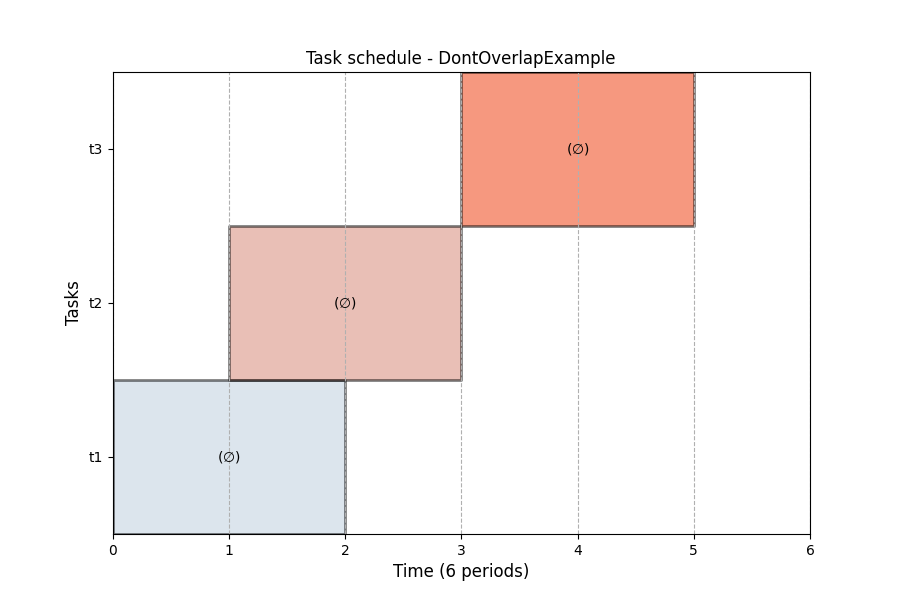

In [3]:
# problem
pb_ovlap = ps.SchedulingProblem(name="DontOverlapExample", horizon=6)
# tasks
t1 = ps.FixedDurationTask(name="t1", duration=2)
t2 = ps.FixedDurationTask(name="t2", duration=2)
t3 = ps.FixedDurationTask(name="t3", duration=2)

# constraints
ps.TaskStartAt(task=t2, value=1)
ps.TasksDontOverlap(task_1=t2, task_2=t3)  # t2 and t3 must not overlap

# solve
solver1 = ps.SchedulingSolver(problem=pb_ovlap)
sol = solver1.solve()
# render_mode set to Tasks because there is no resource
ps.render_gantt_matplotlib(sol, render_mode="Task")

### SelectWorkers assignment
Choose $n$ workers among a list of available workers

Solver type:
===========

-> Standard SAT/SMT solver

Total computation time:
=====================

AlternativeWorkerExample satisfiability checked in 0.04s

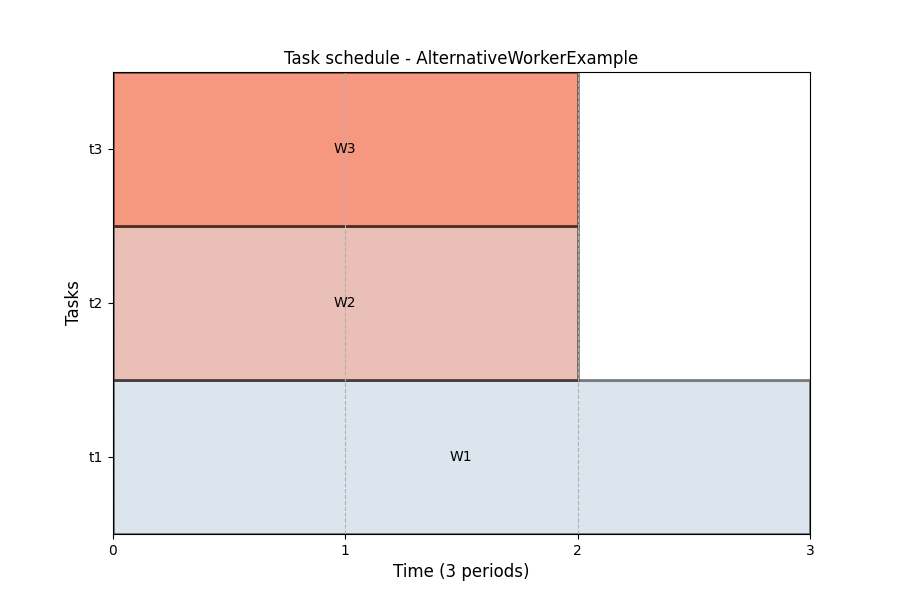

In [4]:
# problem
pb_alt = ps.SchedulingProblem(name="AlternativeWorkerExample")

# tasks
t1 = ps.FixedDurationTask(name="t1", duration=3)
t2 = ps.FixedDurationTask(name="t2", duration=2)
t3 = ps.FixedDurationTask(name="t3", duration=2)

# resource requirements
w1 = ps.Worker(name="W1")
w2 = ps.Worker(name="W2")
w3 = ps.Worker(name="W3")
w4 = ps.SelectWorkers(list_of_workers=[w1, w2, w3], nb_workers_to_select=1, kind="max")

# resource assignement
t1.add_required_resource(w1)  # t1 only needs w1
t2.add_required_resource(w2)  # t2 only needs w2
t3.add_required_resource(w4)  # t3 only needs one of w1, 2 or 3

# solve
solver1 = ps.SchedulingSolver(problem=pb_alt)
sol = solver1.solve()
ps.render_gantt_matplotlib(sol, render_mode="Task")

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 9 elapsed time:0.035s

Checking better value < 9

Found value: 8 elapsed time:0.040s

Checking better value < 8

Found value: 7 elapsed time:0.044s

Checking better value < 7

Found value: 6 elapsed time:0.050s

Checking better value < 6

Found value: 5 elapsed time:0.054s

Checking better value < 5

Can't find a better solution for problem AlternativeWorkerExample.

Found optimum 5. Stopping iteration.

total number of iterations: 6

value: 5

AlternativeWorkerExample satisfiability checked in 0.05s

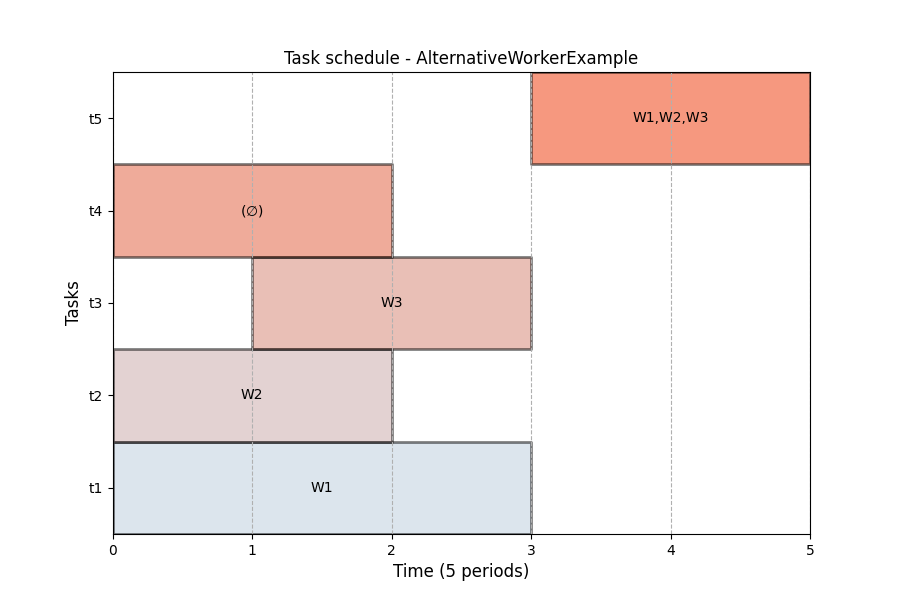

In [5]:
pb_alt = ps.SchedulingProblem(name="AlternativeWorkerExample")

# tasks
t1 = ps.FixedDurationTask(name="t1", duration=3)
t2 = ps.FixedDurationTask(name="t2", duration=2)
t3 = ps.FixedDurationTask(name="t3", duration=2)
t4 = ps.FixedDurationTask(name="t4", duration=2)
t5 = ps.FixedDurationTask(name="t5", duration=2)

# resource requirements
w1 = ps.Worker(name="W1")
w2 = ps.Worker(name="W2")
w3 = ps.Worker(name="W3")
w4 = ps.SelectWorkers(
    list_of_workers=[w1, w2, w3], nb_workers_to_select=1, kind="exact"
)
w5 = ps.SelectWorkers(list_of_workers=[w1, w2, w3], nb_workers_to_select=2, kind="max")
w6 = ps.SelectWorkers(list_of_workers=[w1, w2, w3], nb_workers_to_select=3, kind="min")

# resource assignement
t1.add_required_resource(w1)  # t1 only needs w1
t2.add_required_resource(w2)  # t2 only needs w2
t3.add_required_resource(w4)  # t3 needs one of w1, 2 or 3
t4.add_required_resource(w5)  # t4 needs at most 2 of w1, w2 or 3
t5.add_required_resource(w6)  # t5 needs at least 3 of w1, w2 or w3

ps.ObjectiveMinimizeMakespan()

# solve
solver1 = ps.SchedulingSolver(problem=pb_alt)
sol = solver1.solve()

ps.render_gantt_matplotlib(sol, render_mode="Task")

### Boolean Not for a task constraint

Solver type:
===========

-> Standard SAT/SMT solver

Total computation time:
=====================

NotOperator satisfiability checked in 0.03s

{
    "name": "SchedulingSolution_22104266",
    "type": "SchedulingSolution",
    "horizon": 4,
    "tasks": {
        "t2": {
            "name": "t2",
            "type": "FixedDurationTask",
            "start": 2,
            "end": 4,
            "duration": 2,
            "release_date": null,
            "due_date": null,
            "due_date_is_deadline": true,
            "start_time": null,
            "end_time": null,
            "duration_time": null,
            "optional": false,
            "scheduled": true,
            "work_amount": 0,
            "priority": 1,
            "assigned_resources": []
        }
    },
    "resources": {},
    "buffers": {},
    "indicators": {}
}


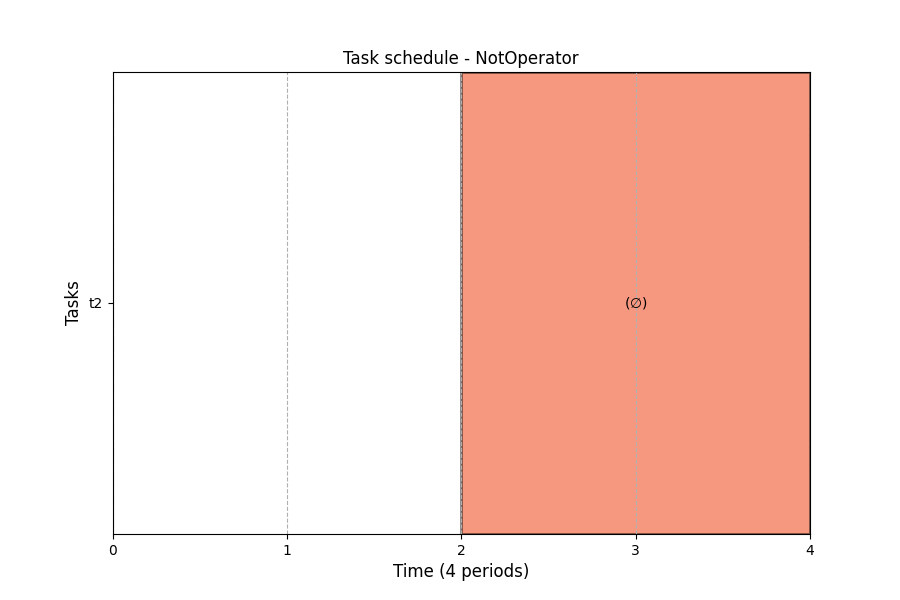

In [6]:
# problem
pb_not = ps.SchedulingProblem(name="NotOperator", horizon=4)

# tasks
t2 = ps.FixedDurationTask(name="t2", duration=2)

# constraints
not_cstr1 = ps.Not(constraint=ps.TaskStartAt(task=t2, value=0))
not_cstr2 = ps.Not(constraint=ps.TaskStartAt(task=t2, value=1))

# solve
solver = ps.SchedulingSolver(problem=pb_not)
sol = solver.solve()
print(sol.to_json())
ps.render_gantt_matplotlib(sol)

### Boolean Or between tasks constraints

Solver type:
===========

-> Standard SAT/SMT solver

Total computation time:
=====================

OrOperator satisfiability checked in 0.04s

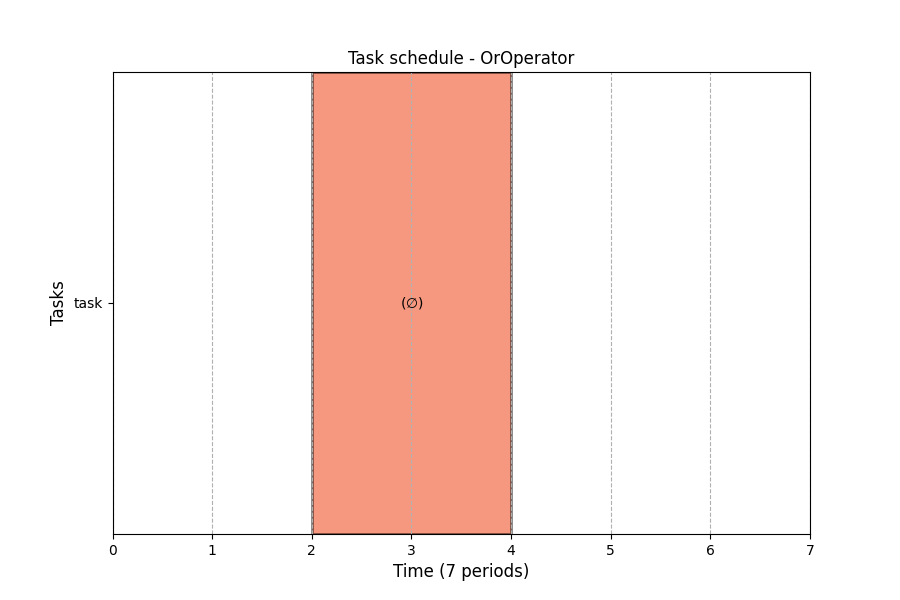

In [7]:
# problem
pb_or = ps.SchedulingProblem(name="OrOperator", horizon=7)

# tasks
task = ps.FixedDurationTask(name="task", duration=2)

# constraint
ps.Or(
    list_of_constraints=[
        ps.TaskStartAt(task=task, value=3),
        ps.TaskStartAt(task=task, value=2),
    ]
)

# solve
solver = ps.SchedulingSolver(problem=pb_or)
sol = solver.solve()
ps.render_gantt_matplotlib(sol)

### Boolean And between tasks constraints

Solver type:
===========

-> Standard SAT/SMT solver

Total computation time:
=====================

AndOperator satisfiability checked in 0.03s

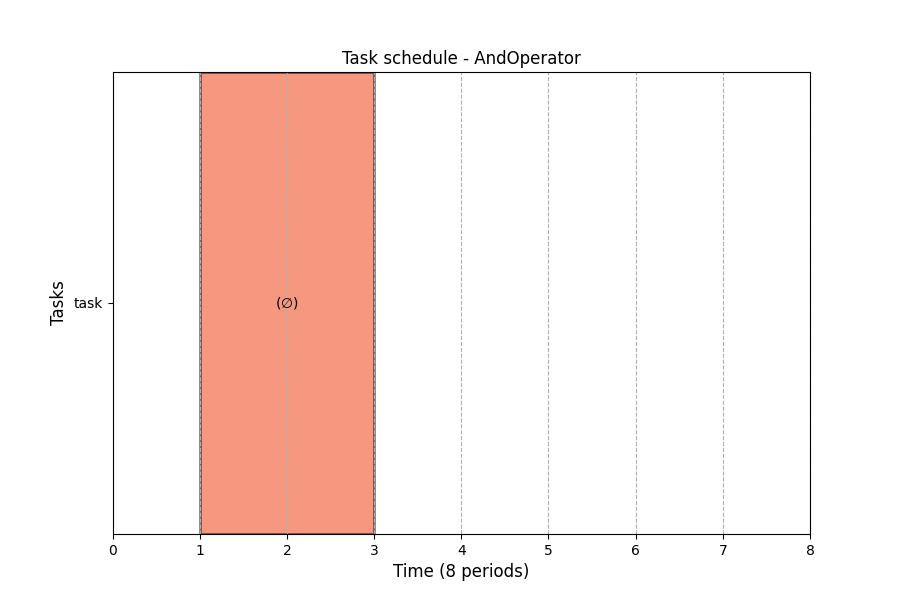

In [8]:
# problem
pb_and = ps.SchedulingProblem(name="AndOperator", horizon=8)

# tasks
task = ps.FixedDurationTask(name="task", duration=2)

# constraint
ps.And(
    list_of_constraints=[
        ps.TaskStartAfter(task=task, value=1),
        ps.TaskEndBefore(task=task, value=4),
    ]
)

# solve
solver = ps.SchedulingSolver(problem=pb_and)
sol = solver.solve()
ps.render_gantt_matplotlib(sol)

In [9]:
problem = ps.SchedulingProblem(name="FindAnotherSolution", horizon=6)
nb_solution = 0
# only one task, there are many diffrent solutions
task_1 = ps.FixedDurationTask(name="task1", duration=2)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()

assert solution

while solution:
    nb_solution += 1
    print("Solution found for task1 start:", solution.tasks[task_1.name].start)
    solution = solver.find_another_solution_for_variable(task_1._start)
print("Number of solutions:", nb_solution)

Solver type:
===========

-> Standard SAT/SMT solver

Total computation time:
=====================

FindAnotherSolution satisfiability checked in 0.04s

Solution found for task1 start: 0


Total computation time:
=====================

FindAnotherSolution satisfiability checked in 0.00s

Solution found for task1 start: 1


Total computation time:
=====================

FindAnotherSolution satisfiability checked in 0.00s

Solution found for task1 start: 2


Total computation time:
=====================

FindAnotherSolution satisfiability checked in 0.00s

Solution found for task1 start: 3


Total computation time:
=====================

FindAnotherSolution satisfiability checked in 0.00s

Solution found for task1 start: 4


No solution can be found for problem FindAnotherSolution.
        Reason: Unsatisfiable problem: no solution exists

Total computation time:
=====================

FindAnotherSolution satisfiability checked in 0.00s

Number of solutions: 5


### Resource unavailability

Solver type:
===========

-> Standard SAT/SMT solver

Total computation time:
=====================

UnavailableResource satisfiability checked in 0.04s

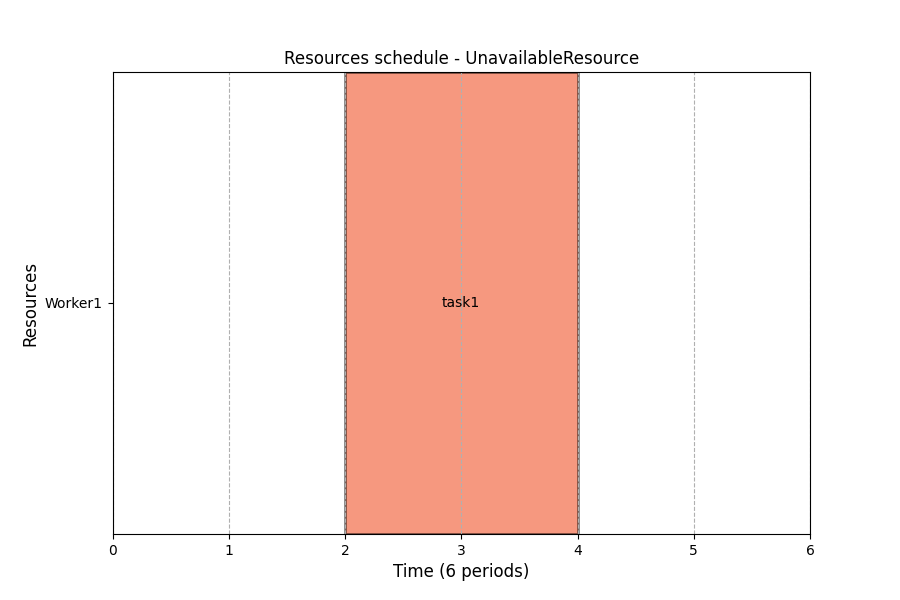

In [10]:
problem = ps.SchedulingProblem(name="UnavailableResource", horizon=6)
nb_solution = 0
# only one task, there are many diffrent solutions
task_1 = ps.FixedDurationTask(name="task1", duration=2)
worker_1 = ps.Worker(name="Worker1")
task_1.add_required_resource(worker_1)
ps.ResourceUnavailable(resource=worker_1, list_of_time_intervals=[(0, 2), (4, 6)])

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()

assert solution

ps.render_gantt_matplotlib(solution, render_mode="Resource")